In [1]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/lukewood/rl-routing && cd rl-routing && pip install .

In [2]:
import networkx as nx
graph=nx.generators.geometric.random_geometric_graph(50, 0.25)

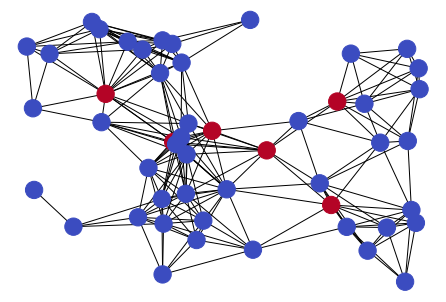

In [ ]:
import matplotlib.pyplot as plt
import time
import rl_routing
from IPython.display import clear_output


env = rl_routing.NetworkEnv(graph=graph)
env.create_packets(n=100)
for _ in range(100):
    if env.done():
        break
    env.step()
    env.render()
    plt.show()
    time.sleep(150/1000)
    clear_output(wait=True)